# FEATURE DESCRIPTION
Description:
A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. 

Data Dictionary:

price: Price of the Houses

area:Area of a House

bedrooms: Number of House Bedrooms

bathrooms: Number if Bathrooms

stories: Number of House Stories

mainroad: Wether connected to Main Road

guestroom: Wether has a guest room

basement: Wether has a basement

hotwaterheating: Wether has a hotwater heater

airconditioning: Wether has an airconditioning

parking: Number of House Parkings

prefarea: Prefarea of the House

furnishingstatus: Furnishing status of the House

# OVERVIEW

In [220]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz

import warnings
warnings.filterwarnings('ignore')

## LOAD DATA

> In this section we will import the required libraries, load data and also check important information for later analysis such as: data types, missing values, etc

In [2]:
df = pd.read_csv('data/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [187]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

> Based on the information above, it can be concluded that our dataset has 545 rows and 12 columns, and there are no missing values in our dataset.

# PREPROCESSING

## Missing Values Handling

In [6]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Outlier Handling
> In this section we will handle outliers in our dataset because we will use a model that is quite affected by outliers.

In [7]:
def find_outliers(data):
    Q1 = data.quantile(.25)
    Q3 = data.quantile(.75)
    
    IQR = Q3 - Q1

    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    
    low_out = []
    upper_out = []
    
    for i in data:
        if(i < min_IQR):
            low_out.append(i)
        if(i > max_IQR):
            upper_out.append(i)
            
    return low_out, upper_out

In [8]:
def outlierwinsorize(dataframe, feature):
    lower_out = find_outliers(dataframe[feature])[0]
    upper_out = find_outliers(dataframe[feature])[1]
    
    print(f'Jumlah Outlier = {len(lower_out) + len(upper_out)}')
    persen_out = (len(lower_out) + len(upper_out))/len(dataframe)*100
    print(f'Presentasi Outlier = {round(persen_out, 2)}%')
    
    iqr = dataframe[feature].quantile(.75) - dataframe[feature].quantile(.25)   
    upper_limit = dataframe[feature].quantile(.75) + 1.5 * iqr
    print('Upper_limit', upper_limit)
    print('\n')
    
    j = 0
    for i in range(10):
        print(f'quantile {0.90+j} = {dataframe[feature].quantile(0.90 + j)}')
        j += 0.01

### price

In [9]:
df_win = df.copy()

In [10]:
outlierwinsorize(df_win, 'price')

Jumlah Outlier = 15
Presentasi Outlier = 2.75%
Upper_limit 9205000.0


quantile 0.9 = 7350000.0
quantile 0.91 = 7421400.000000001
quantile 0.92 = 7627200.000000003
quantile 0.93 = 7958300.000000001
quantile 0.9400000000000001 = 8227799.999999995
quantile 0.9500000000000001 = 8400000.0
quantile 0.9600000000000001 = 8653400.000000004
quantile 0.97 = 9055199.999999993
quantile 0.98 = 9695280.0
quantile 0.99 = 10541999.999999963


In [11]:
df_win['price_win'] = stats.mstats.winsorize(df['price'], limits=(0.0,0.03))

<AxesSubplot:>

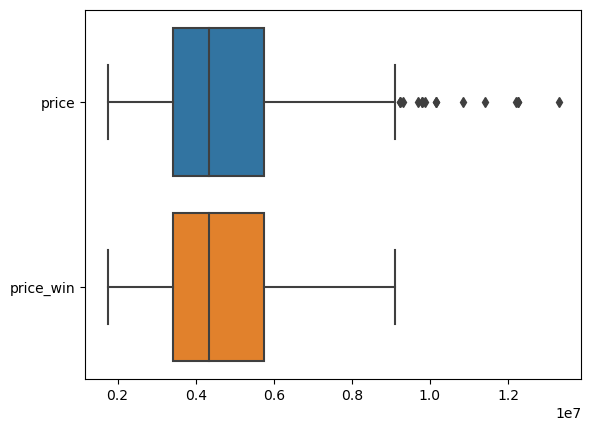

In [12]:
sns.boxplot(data = df_win[['price', 'price_win']], orient='h')

### area

In [13]:
outlierwinsorize(df_win, 'area')

Jumlah Outlier = 12
Presentasi Outlier = 2.2%
Upper_limit 10500.0


quantile 0.9 = 7980.0
quantile 0.91 = 8100.0
quantile 0.92 = 8250.0
quantile 0.93 = 8400.0
quantile 0.9400000000000001 = 8826.999999999996
quantile 0.9500000000000001 = 9000.0
quantile 0.9600000000000001 = 9631.280000000006
quantile 0.97 = 10259.72
quantile 0.98 = 10757.000000000002
quantile 0.99 = 12543.599999999955


In [14]:
df_win['area_win'] = stats.mstats.winsorize(df['area'], limits=(0.0,0.03))

<AxesSubplot:>

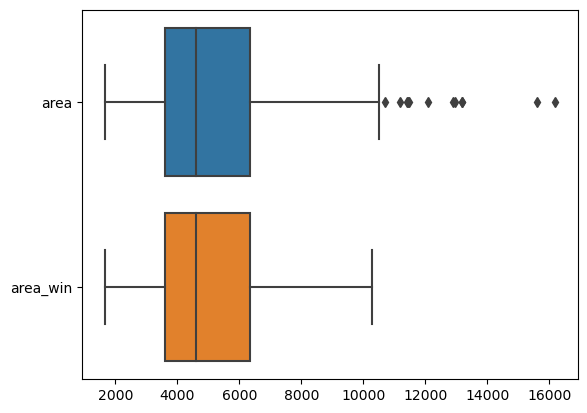

In [15]:
sns.boxplot(data = df_win[['area', 'area_win']], orient='h')

### bedrooms

In [16]:
outlierwinsorize(df_win, 'bedrooms')

Jumlah Outlier = 12
Presentasi Outlier = 2.2%
Upper_limit 4.5


quantile 0.9 = 4.0
quantile 0.91 = 4.0
quantile 0.92 = 4.0
quantile 0.93 = 4.0
quantile 0.9400000000000001 = 4.0
quantile 0.9500000000000001 = 4.0
quantile 0.9600000000000001 = 4.0
quantile 0.97 = 4.0
quantile 0.98 = 5.0
quantile 0.99 = 5.0


In [17]:
df_win['bedrooms_win'] = stats.mstats.winsorize(df['bedrooms'], limits=(0.0,0.03))

<AxesSubplot:>

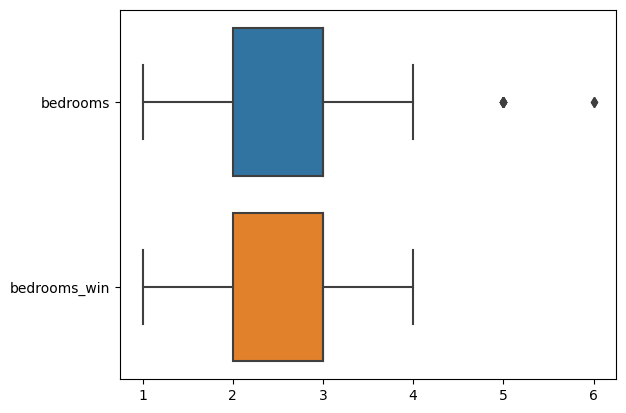

In [18]:
sns.boxplot(data = df_win[['bedrooms', 'bedrooms_win']], orient='h')

### bathrooms

In [19]:
df.select_dtypes(exclude='object').columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [20]:
outlierwinsorize(df_win, 'bathrooms')

Jumlah Outlier = 1
Presentasi Outlier = 0.18%
Upper_limit 3.5


quantile 0.9 = 2.0
quantile 0.91 = 2.0
quantile 0.92 = 2.0
quantile 0.93 = 2.0
quantile 0.9400000000000001 = 2.0
quantile 0.9500000000000001 = 2.0
quantile 0.9600000000000001 = 2.0
quantile 0.97 = 2.0
quantile 0.98 = 2.1200000000000045
quantile 0.99 = 3.0


In [21]:
df_win['bathrooms_win'] = stats.mstats.winsorize(df['bathrooms'], limits=(0.0,0.01))

In [22]:
1-0.99

0.010000000000000009

<AxesSubplot:>

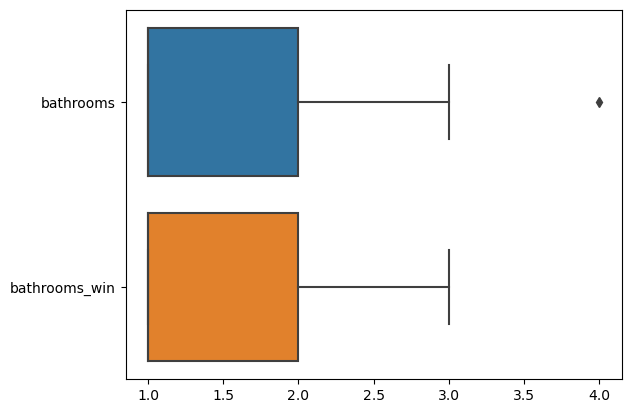

In [23]:
sns.boxplot(data = df_win[['bathrooms', 'bathrooms_win']], orient='h')

### stories

In [24]:
outlierwinsorize(df_win, 'stories')

Jumlah Outlier = 41
Presentasi Outlier = 7.52%
Upper_limit 3.5


quantile 0.9 = 3.0
quantile 0.91 = 3.0
quantile 0.92 = 3.0
quantile 0.93 = 4.0
quantile 0.9400000000000001 = 4.0
quantile 0.9500000000000001 = 4.0
quantile 0.9600000000000001 = 4.0
quantile 0.97 = 4.0
quantile 0.98 = 4.0
quantile 0.99 = 4.0


In [25]:
df_win['stories_win'] = stats.mstats.winsorize(df['stories'], limits=(0.0,0.08))

<AxesSubplot:>

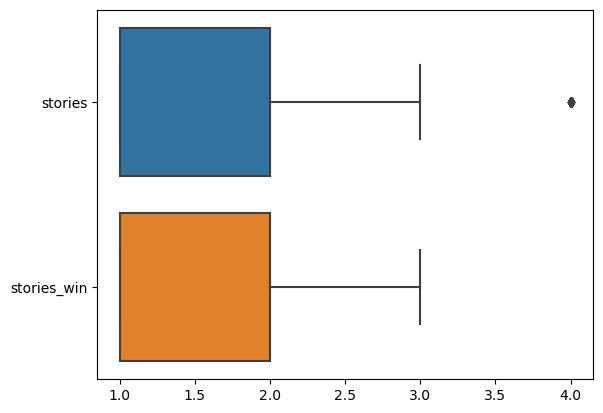

In [26]:
sns.boxplot(data = df_win[['stories', 'stories_win']], orient='h')

### parking

In [27]:
outlierwinsorize(df_win, 'parking')

Jumlah Outlier = 12
Presentasi Outlier = 2.2%
Upper_limit 2.5


quantile 0.9 = 2.0
quantile 0.91 = 2.0
quantile 0.92 = 2.0
quantile 0.93 = 2.0
quantile 0.9400000000000001 = 2.0
quantile 0.9500000000000001 = 2.0
quantile 0.9600000000000001 = 2.0
quantile 0.97 = 2.0
quantile 0.98 = 3.0
quantile 0.99 = 3.0


In [28]:
df_win['parking_win'] = stats.mstats.winsorize(df['parking'], limits=(0.0,0.03))

<AxesSubplot:>

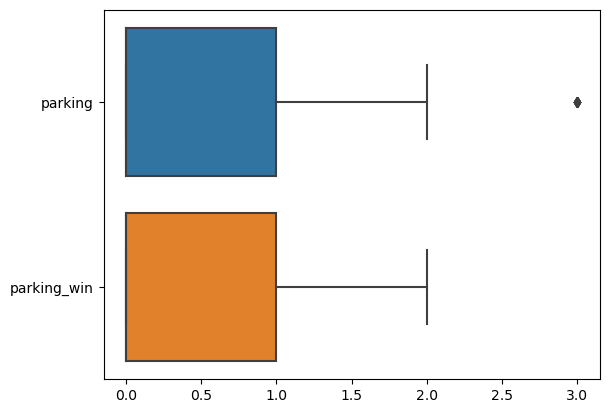

In [29]:
sns.boxplot(data = df_win[['parking', 'parking_win']], orient='h')

# EDA

## NUMERICAL FEATURE

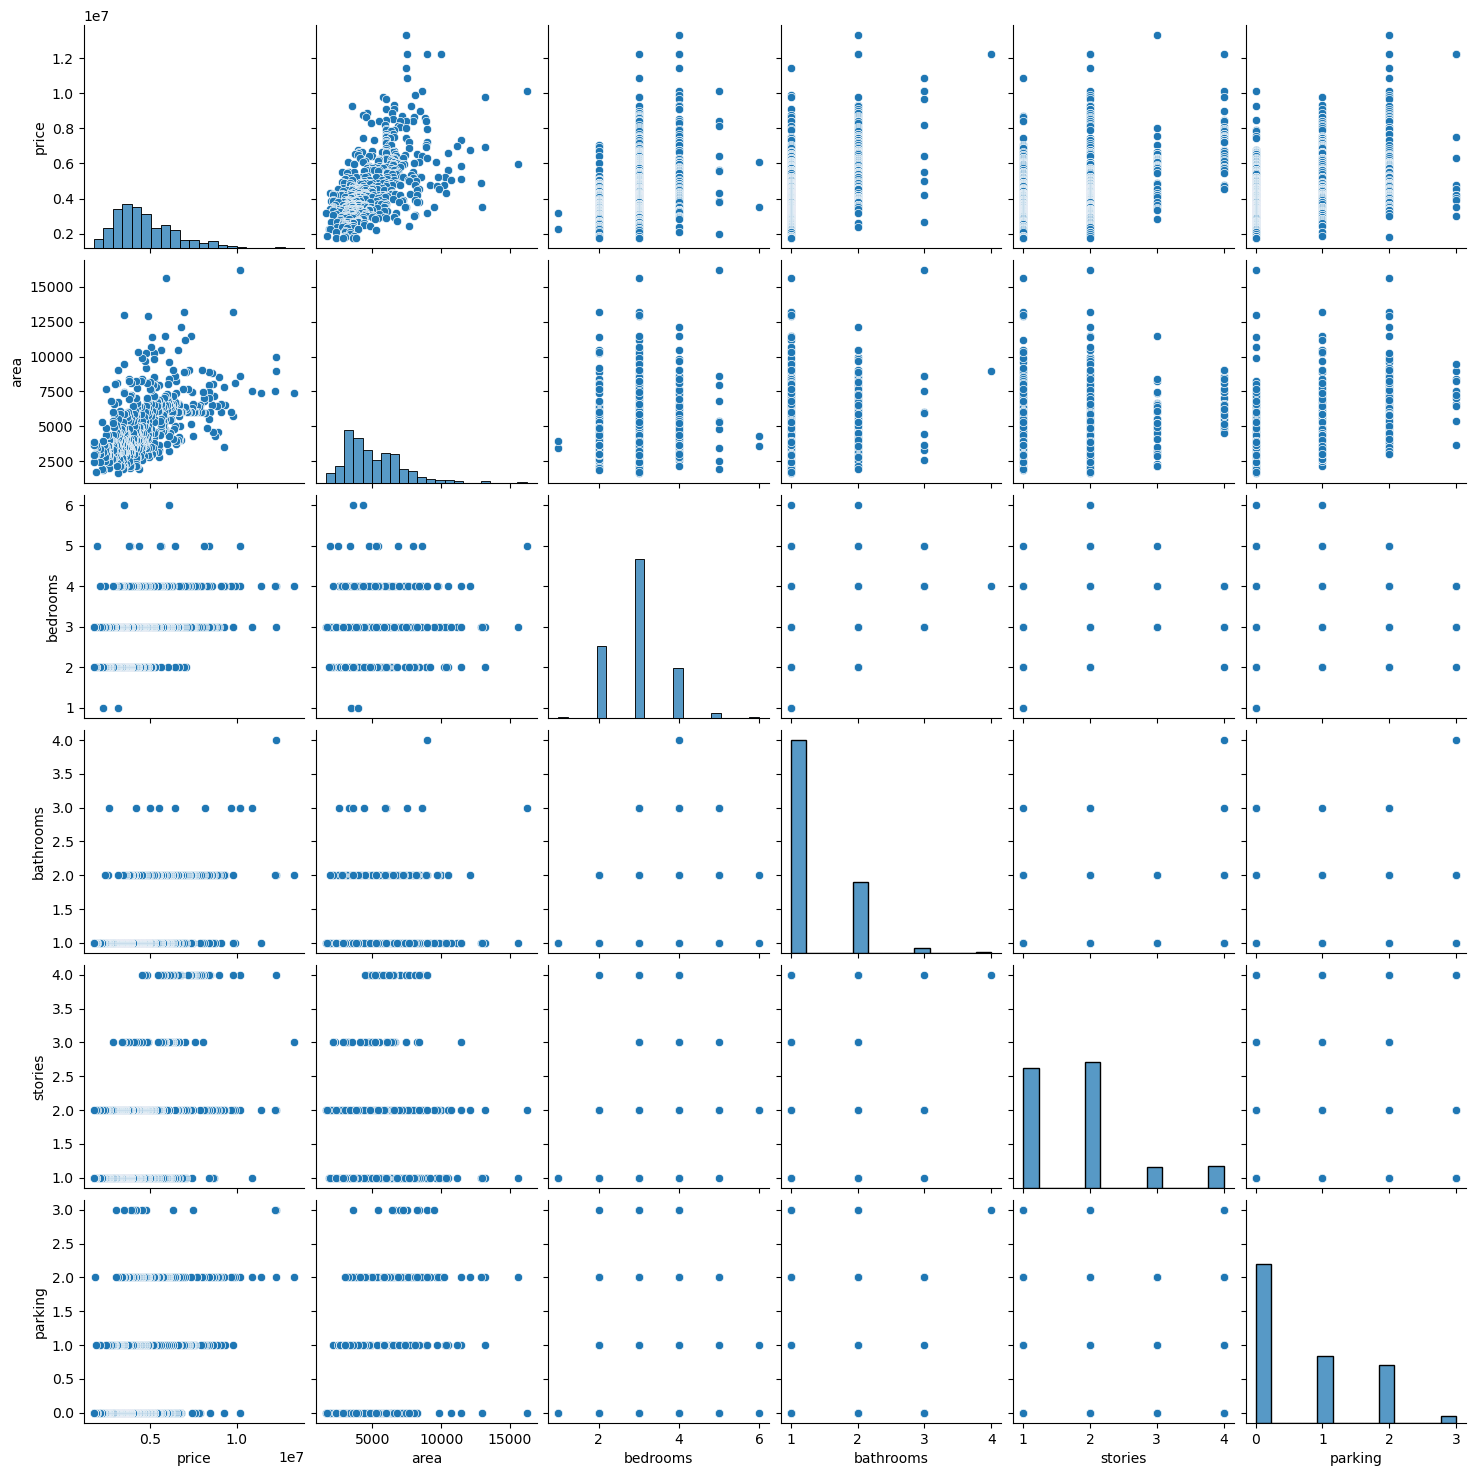

In [32]:
sns.pairplot(data=df.select_dtypes(exclude='object'))
plt.ticklabel_format(style='plain', axis='y')
plt.show()

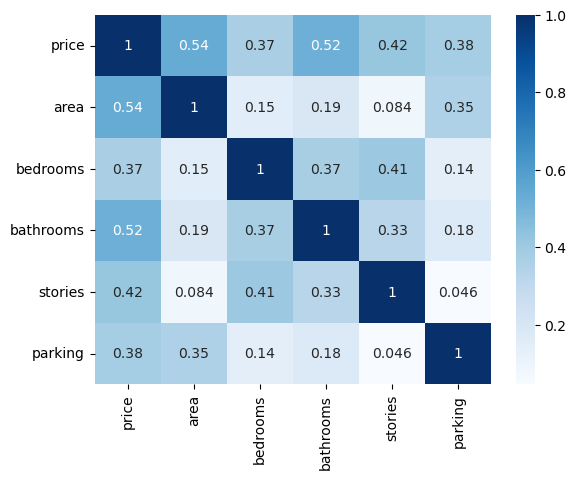

In [33]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='Blues')
plt.show()

In [34]:
df.select_dtypes(exclude='object').mode()

,price,area,bedrooms,bathrooms,stories,parking
0,3500000,6000.0,3.0,1.0,2.0,0.0
1,4200000,NaN,NaN,NaN,NaN,NaN


In [35]:
df.select_dtypes(exclude='object').describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


> Berdasarkan plot dan statistika descriptif diatas dapat diambil kesimpulan:
> 1. Semua distribusi feature numerical tidak ada yang normal dan skew positif.
> 2. Korelasi antar feature paling kuat dimiliki oleh feature <b>price dengan area sebesar 0.54</b> dan <b>price dengan bathroms sebesar 0.52</b>.
> 3. Kebanyakan rumah memiliki <b>rentang harga 3500000 sampai 4200000</b> dan memiliki <b>rata-rata harga 4766729</b>.
> 4. Kebanyakan rumah memiliki <b>luas rumah sebesar 6000 dan memiliki rata-rata sebesar 5150</b>.
> 5. Kebanyakan rumah memiliki <b>bedrooms sebanyak 3 dan rata-rata 2.965 setiap rumah</b>.
> 6. Kebanyakan rumah memiliki <b>kamar mandi sebanyak 1 dan rata-rata 1.286</b>.
> 7. Kebanyakan rumah memiliki <b>2 lamtai dan rata-rata sebanyak 1.85</b>.
> 8. Kebanyakan rumah <b>tidak memiliki garasi</b>.

## CATEGORICAL FEATURE

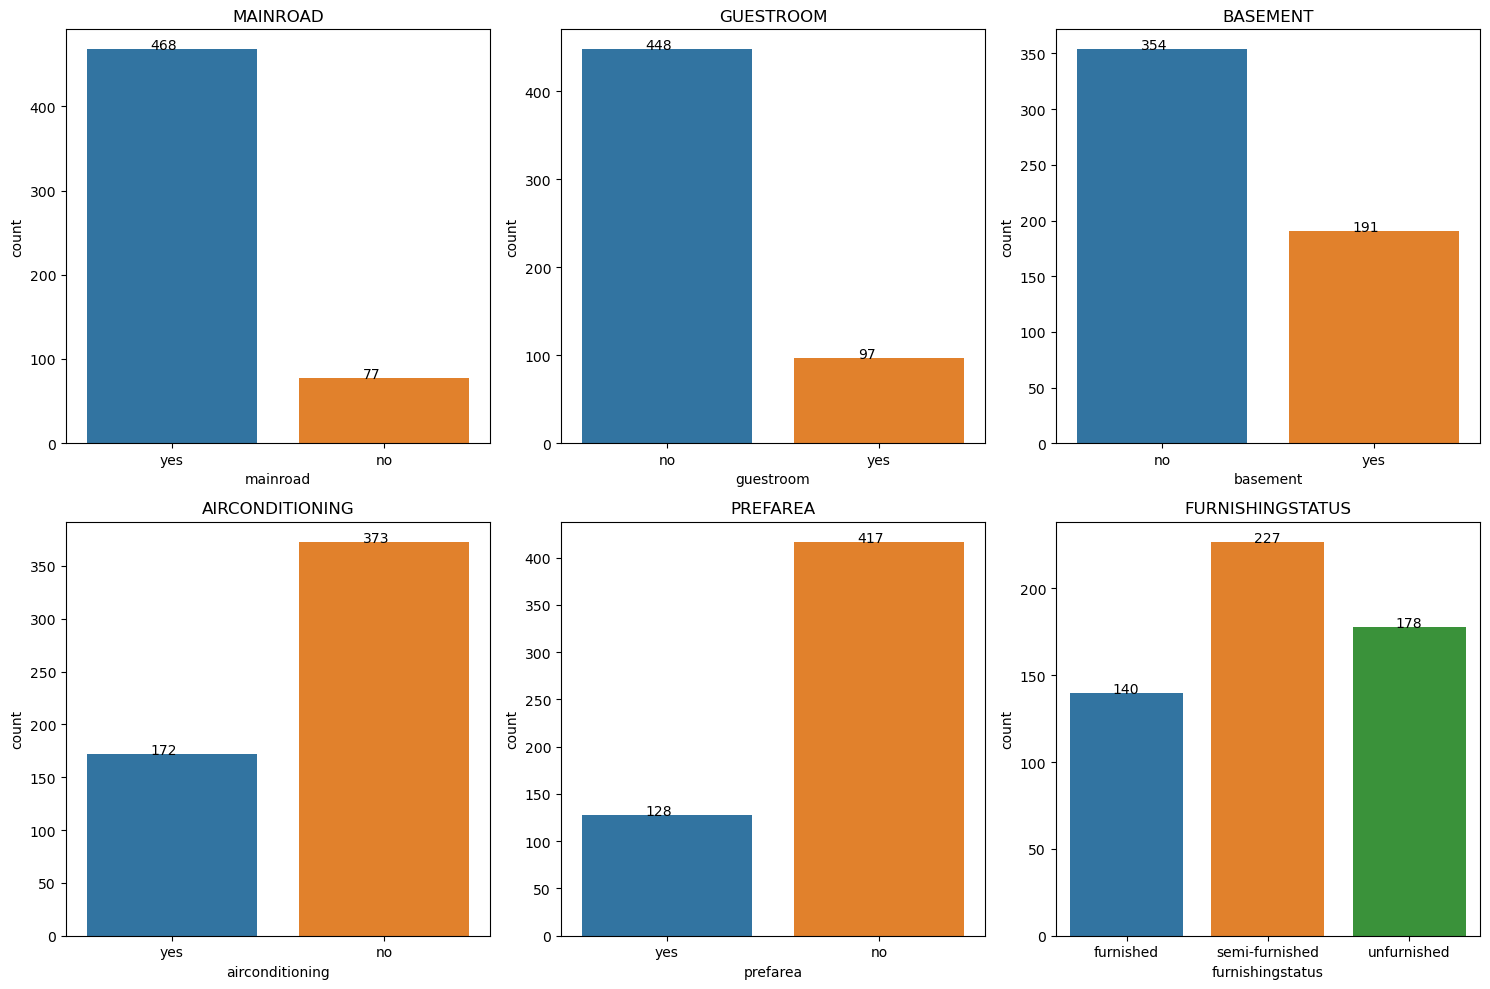

In [153]:
col = 0
row = 0
fig,ax =  plt.subplots(2,3, figsize=(15,10))

for i in df.select_dtypes(include='object'):
    if col < 3:
        z = sns.countplot(data=df, x=i, ax=ax[row][col])
        for p in z.patches:
            z.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.02))
        ax[row][col].set_title(i.upper())
        col+=1
    else:
        col=0
        row+=1
plt.tight_layout()
plt.show()

> Berdasarkan Plot diatas dapat diambil kesimpulan:
> 1. Sebanyak <b>468 rumah sudah tersambung ke jalan utama dan 77 belum</b>.
> 2. Sebanyak <b>448 rumah belum memiliki guestroom dan 97 sudah</b>.
> 3. Sebanyak <b>354 rumah belum memiliki basement dan 191 sudah</b>.
> 4. Sebanyak <b>172 rumah sudah memiliki airconditioning dan 373 belum</b>.
> 5. Sebanyak <b>128 rumah sudah terletak di lingkungan pilihan kota sedangkan 417 belum</b>.
> 6. Sebanyak <b>140 rumah sudah furnished, 227 semi-furnished dan 178 belum</b>.

# FEATURE ENGINEERING
> This section is used to transform raw data into features that can be used to create predictive models using Machine Learning or Statistical Modeling. Feature engineering in Machine Learning aims to improve model performance.

## FEATURE ENCODE
> Changing the categorical values in our dataset to numerical so that our model can understand,

In [36]:
df_enc = df_win.copy()

In [37]:
df_enc = df_enc.drop(columns=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'])

In [38]:
df_enc.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,price_win,area_win,bedrooms_win,bathrooms_win,stories_win,parking_win
0,yes,no,no,no,yes,yes,furnished,9100000,7420,4,2,3,2
1,yes,no,no,no,yes,no,furnished,9100000,8960,4,3,3,2
2,yes,no,yes,no,no,yes,semi-furnished,9100000,9960,3,2,2,2
3,yes,no,yes,no,yes,yes,furnished,9100000,7500,4,2,2,2
4,yes,yes,yes,no,yes,no,furnished,9100000,7420,4,1,2,2


### ONE HOT ENCODING
> Mengubah nilai nominal pada feature dataset kita ke numerical.

In [39]:
for i in df_enc[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]:
    df_enc = pd.get_dummies(df_enc, prefix=i, columns=[i], drop_first=True)

In [40]:
df_enc.head()

,furnishingstatus,price_win,area_win,bedrooms_win,bathrooms_win,stories_win,parking_win,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,furnished,9100000,7420,4,2,3,2,1,0,0,0,1,1
1,furnished,9100000,8960,4,3,3,2,1,0,0,0,1,0
2,semi-furnished,9100000,9960,3,2,2,2,1,0,1,0,0,1
3,furnished,9100000,7500,4,2,2,2,1,0,1,0,1,1
4,furnished,9100000,7420,4,1,2,2,1,1,1,0,1,0


### ORDINAL ENCODING
> Changing the ordinal values in our feature dataset to numerical.

In [41]:
furniture_order = ['unfurnished', 'furnished', 'semi-furnished']
df_enc['furnishingstatus_enc'] = OrdinalEncoder().fit_transform(df_enc[['furnishingstatus']])
df_enc = df_enc.drop(columns=['furnishingstatus'])

In [42]:
df_enc.head()

,price_win,area_win,bedrooms_win,bathrooms_win,stories_win,parking_win,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_enc
0,9100000,7420,4,2,3,2,1,0,0,0,1,1,0.0
1,9100000,8960,4,3,3,2,1,0,0,0,1,0,0.0
2,9100000,9960,3,2,2,2,1,0,1,0,0,1,1.0
3,9100000,7500,4,2,2,2,1,0,1,0,1,1,0.0
4,9100000,7420,4,1,2,2,1,1,1,0,1,0,0.0


## FEATURE SCALLING
> Scaling the numerical features in our dataset to have the same scale, because some machine learning models are affected by distance so it's a good idea to scale these features so that the model can predict better.

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
df_scl = df_enc.copy()
scale = MinMaxScaler()

In [75]:
df_scl[['price_win','area_win','bedrooms_win','bathrooms_win','stories_win','parking_win']] = scale.fit_transform(df_scl[['price_win','area_win','bedrooms_win','bathrooms_win','stories_win','parking_win']])

In [76]:
df_scl.head()

,price_win,area_win,bedrooms_win,bathrooms_win,stories_win,parking_win,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_enc
0,1.0,0.669451,1.000000,0.5,1.0,1.0,1,0,0,0,1,1,0.0
1,1.0,0.848126,1.000000,1.0,1.0,1.0,1,0,0,0,1,0,0.0
2,1.0,0.964149,0.666667,0.5,0.5,1.0,1,0,1,0,0,1,1.0
3,1.0,0.678733,1.000000,0.5,0.5,1.0,1,0,1,0,1,1,0.0
4,1.0,0.669451,1.000000,0.0,0.5,1.0,1,1,1,0,1,0,0.0


## FEATURE SELECTION
> Selecting important features for our model uses feature importance which is based on a decision tree to lighten the performance of our model in order to better predict results.

In [77]:
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

In [78]:
df_slc = df_scl.copy()

In [79]:
x = df_slc.drop(columns=['price_win']) #independent feature
y = df_slc['price_win'] #target

[0.2497641  0.0531457  0.20508828 0.05122838 0.06265869 0.03110975
 0.03065748 0.03935043 0.02251105 0.13874838 0.04900959 0.06672818]


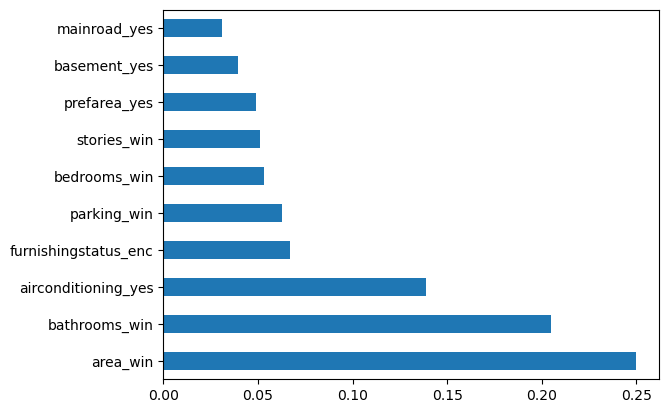

In [80]:
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [81]:
features = feat_importances.nlargest(10).index.tolist()

In [82]:
features.append('price_win')

In [83]:
df_slc = df_slc[features]

In [84]:
df_slc.head()

,area_win,bathrooms_win,airconditioning_yes,furnishingstatus_enc,parking_win,bedrooms_win,stories_win,prefarea_yes,basement_yes,mainroad_yes,price_win
0,0.669451,0.5,1,0.0,1.0,1.000000,1.0,1,0,1,1.0
1,0.848126,1.0,1,0.0,1.0,1.000000,1.0,0,0,1,1.0
2,0.964149,0.5,0,1.0,1.0,0.666667,0.5,1,1,1,1.0
3,0.678733,0.5,1,0.0,1.0,1.000000,0.5,1,1,1,1.0
4,0.669451,0.0,1,0.0,1.0,1.000000,0.5,0,1,1,1.0


<AxesSubplot:>

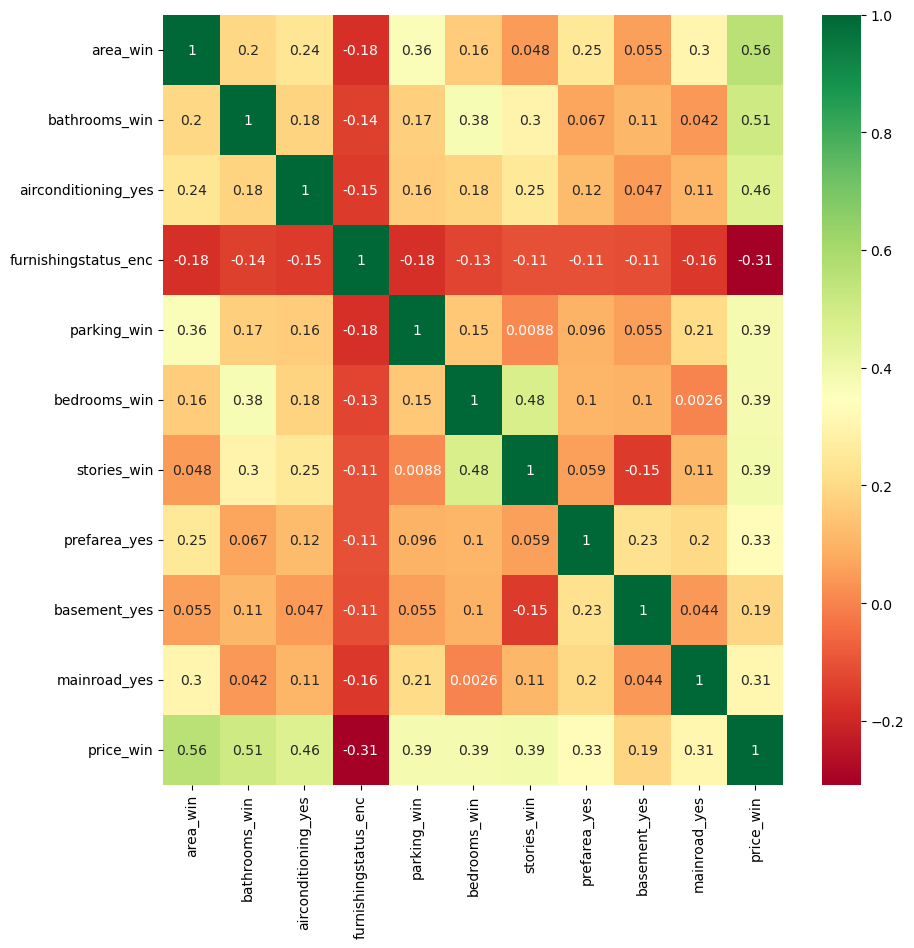

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(df_slc.corr('pearson'), annot=True, cmap="RdYlGn")

# MODELLING

## MULTIPLE LINEAR REGRESSION

In [162]:
x = df_slc.drop(columns=['price_win']).values
y = df_slc['price_win'].values.reshape(-1,1)

In [163]:
# tarin test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) #size test 20%

In [164]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [165]:
y_pred = linear_reg.predict(X_test)

In [166]:
result = pd.DataFrame()
result['y_act'] = [i for i in y_test.flatten()]
result['y_pred'] = y_pred.flatten()

In [167]:
for i in range(X_test.shape[1]):
    result[f'X{i+1}'] = [j[i] for j in X_test]

In [168]:
result.head()

,y_act,y_pred,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,0.385714,0.329919,0.272653,0.0,0.0,0.0,0.5,0.666667,0.5,0.0,0.0,1.0
1,0.589524,0.634420,0.924701,0.0,0.0,0.0,1.0,0.666667,0.0,1.0,1.0,1.0
2,0.307143,0.369994,0.210001,0.0,1.0,1.0,0.0,1.000000,0.5,0.0,0.0,1.0
3,0.704762,0.530003,1.000000,0.0,0.0,0.0,0.5,0.333333,0.0,0.0,1.0,1.0
4,0.161905,0.175291,0.233206,0.0,0.0,2.0,0.0,1.000000,0.5,0.0,0.0,0.0


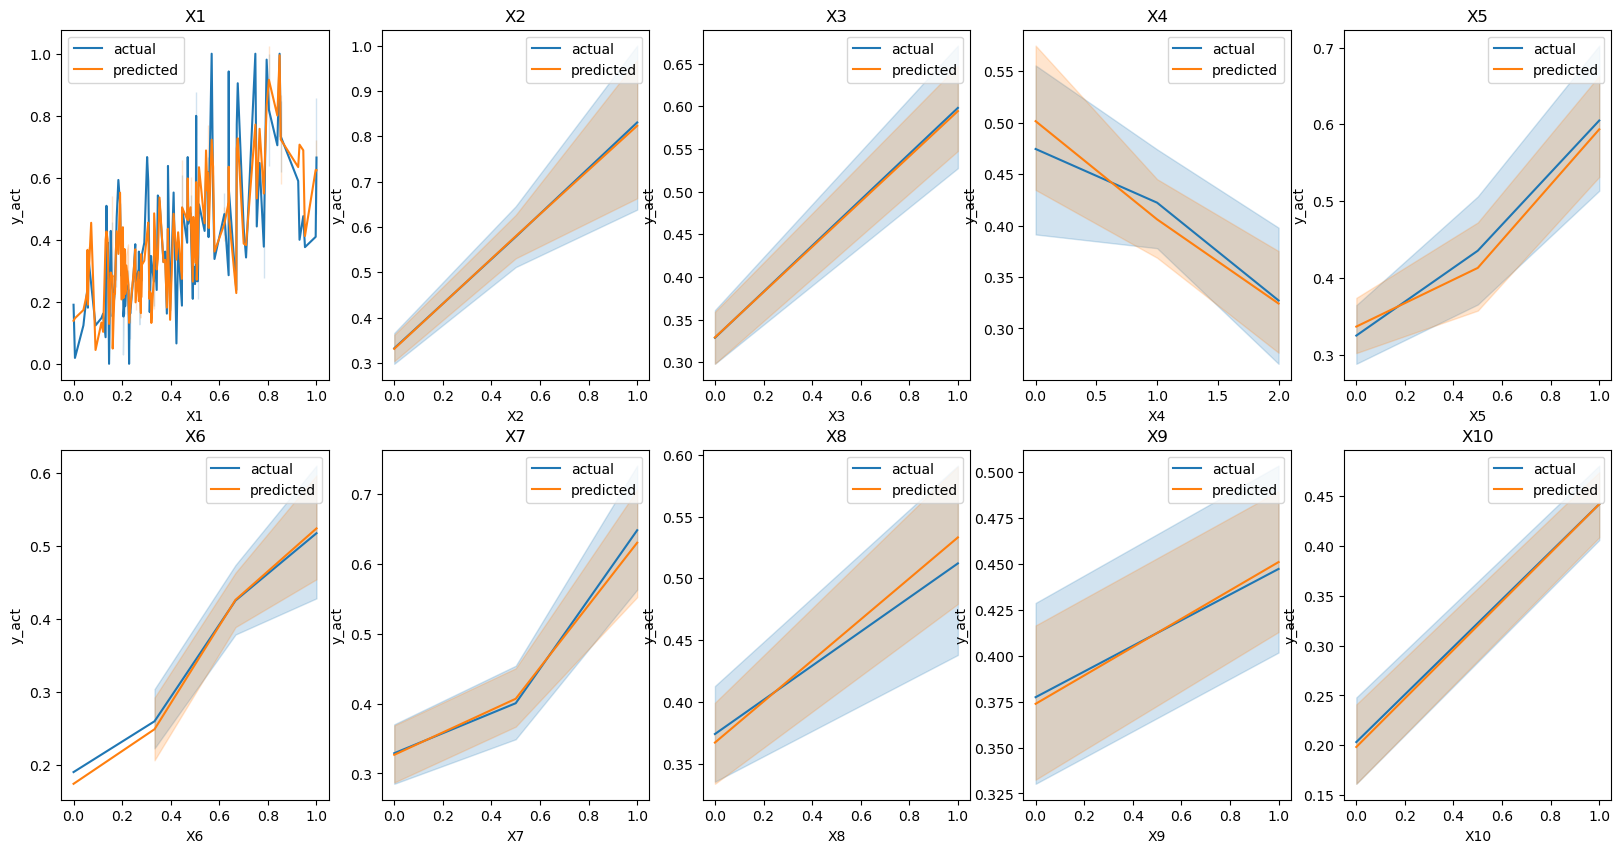

In [169]:
col = 0
fig, axs = plt.subplots(2,5, figsize=(20,10))
for i in range(1, 11):
    if col < 5:
        sns.lineplot(data=result, x=f'X{i}', y='y_act', label='actual', ax=axs[0][col])
        sns.lineplot(data=result, x=f'X{i}', y='y_pred', label='predicted', ax=axs[0][col])
        axs[0][col].title.set_text(f'X{i}')
    else:
        sns.lineplot(data=result, x=f'X{i}', y='y_act', label='actual', ax=axs[1][col-5])
        sns.lineplot(data=result, x=f'X{i}', y='y_pred', label='predicted', ax=axs[1][col-5])
        axs[1][col-5].title.set_text(f'X{i}')
    col +=1

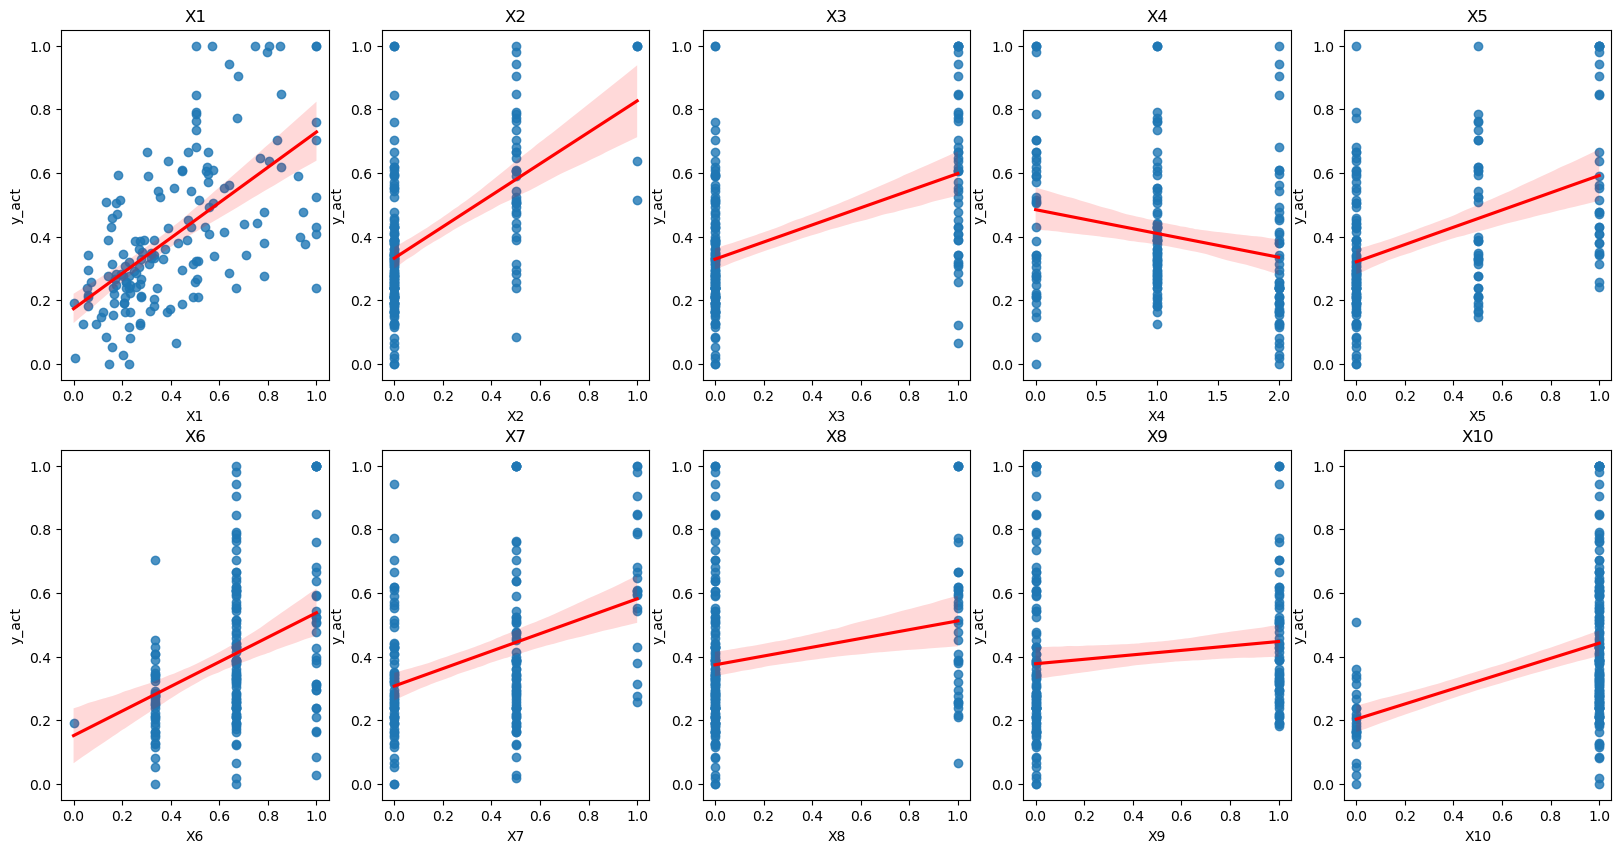

In [170]:
col = 0
fig, axs = plt.subplots(2,5, figsize=(20,10))
for i in range(1, 11):
    if col < 5:
        sns.regplot(data=result, x=f'X{i}', y='y_act', label='actual', ax=axs[0][col], line_kws={"color": "red"})
        
        axs[0][col].title.set_text(f'X{i}')
    else:
        sns.regplot(data=result, x=f'X{i}', y='y_act', label='actual', ax=axs[1][col-5], line_kws={"color": "red"})
       
        axs[1][col-5].title.set_text(f'X{i}')
    col +=1

In [171]:
round(metrics.r2_score(y_test, y_pred), 2)

0.72

In [172]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.12590497981068205


> From the results above, our linear regression model has an r square score of 72% and an rmse of 0.12.

## DECISION TREE

In [205]:
x1 = df_slc.drop(columns=['price_win'])
y1 = df_slc['price_win']

In [206]:
# tarin test split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=0) #size test 20%

In [207]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [208]:
y_pred = model.predict(X_test)

In [209]:
result = pd.DataFrame()
result['y_act'] = y_test
result['y_pred'] = y_pred

In [210]:
result.head()

,y_act,y_pred
239,0.385714,0.429524
113,0.589524,0.476190
325,0.307143,0.352381
66,0.704762,0.523810
479,0.161905,0.201905


In [211]:
round(metrics.r2_score(y_test, y_pred), 2)

0.25

In [212]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.20439420500669428


> Based on the results above, our decision tree model has an r squared score of 0.25 and an rmse of 0.20..

In [213]:
DT_cols = X_train.columns.tolist()

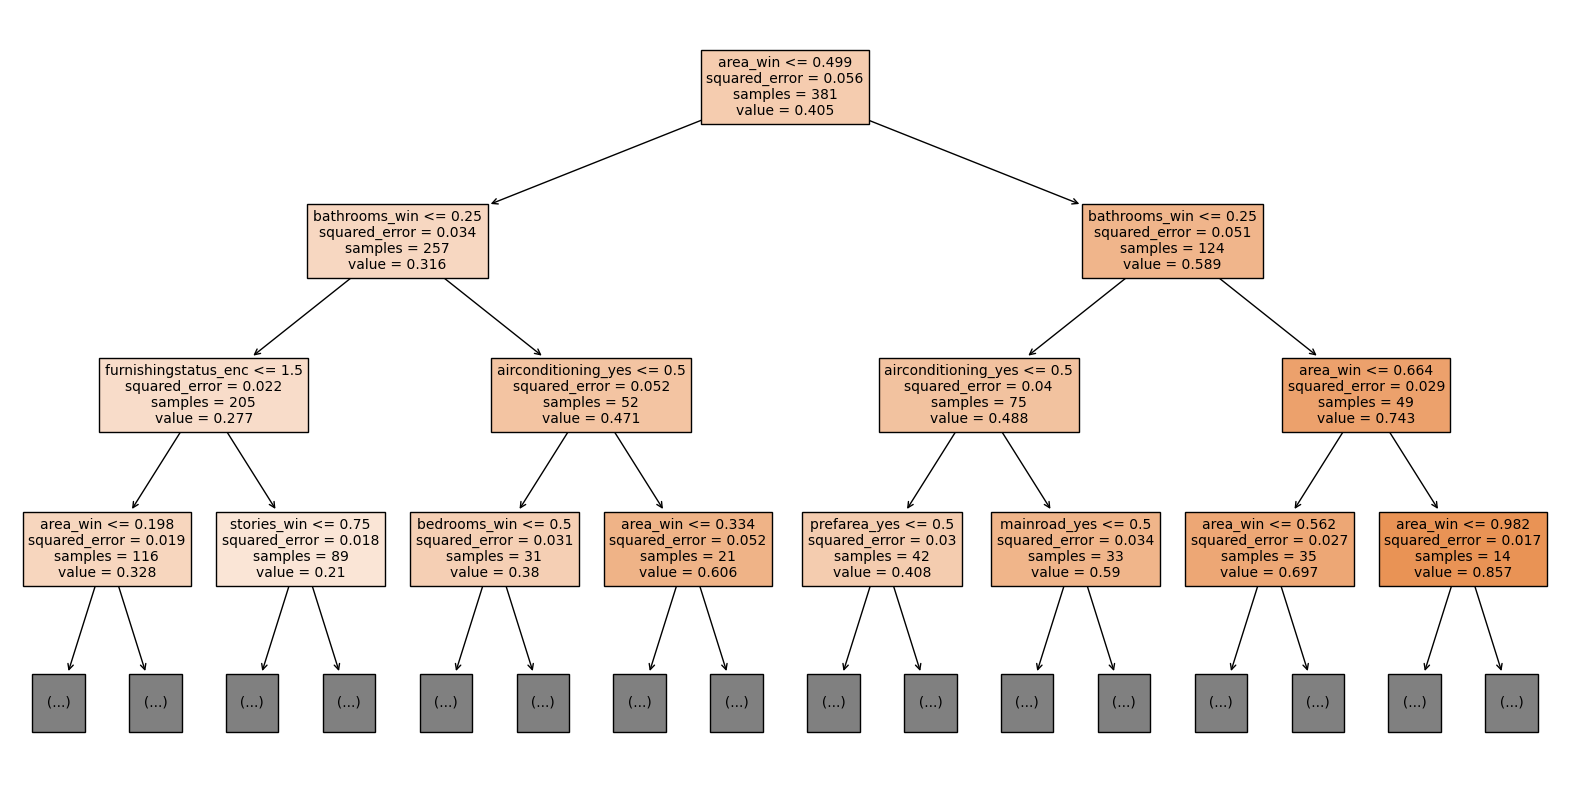

In [214]:
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names= DT_cols, impurity=True,
          fontsize=10, max_depth=3,
          filled=True)
plt.show()

## MODEL EVALUATION

In [218]:
df_model_eval = pd.DataFrame({
                'r2_score':['0.72','0.25'],
                'RMSE' : ['0.12', '0.20']
             }, index=['Linear Regression', 'Decision Tree'])

In [219]:
df_model_eval

,r2_score,RMSE
Linear Regression,0.72,0.12
Decision Tree,0.25,0.20


> <b>Conclusion</b>, the best model for our dataset this time is linear regression because it has a larger r square and also has a smaller <b>RMSE</b> value which is an indication that the model is better at guessing the target value.